### Introduction 
- The logistic regression model, despite its name, is actually a linear model for classification. 

Logistic regression has the same main idea as linear regression. The difference is that this technique is used when the output or dependent variable is binary meaning the outcome can have only two possible values

## Types of Logistic Regression:
Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.

Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.

Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

## Diabetes Logistic Regression Prediction

## DataSet Details


Pregnancies decribes the number of times the person has been pregnant.

Glucose describes the blood glucose level on testing.

Blood pressure describes the diastolic blood pressure.

Skin Thickenss describes the skin fold thickness of the triceps.

Insulin describes the amount of insulin in a 2hour serum test.

BMI describes he body mass index.

DiabetesPedigreeFunction describes the family history of the person.

Age describes the age of the person.

Outcome describes if the person is predicted to have diabetes or not.



## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Loading the dataset

In [3]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

In [4]:
## check rows and columns
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Check if there are any missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Machine Learning

In [1]:
## Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



In [5]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size = 0.3)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Model Evaluation

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Confusion Matrix

In [25]:
y_pred=classifier.predict(X_test)

In [26]:
# compare your test values and the predicted ones and output a confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
cm

array([[123,  19],
       [ 40,  49]], dtype=int64)

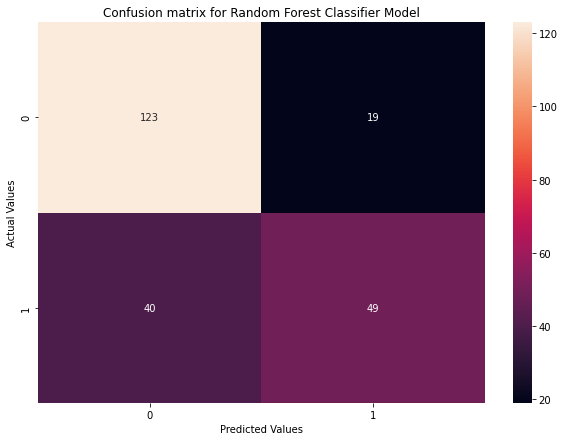

In [32]:
# confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Accuracy Score

In [33]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy score is : {}%".format(score))

Accuracy score is : 74.46000000000001%


## Classification _report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       142
           1       0.72      0.55      0.62        89

    accuracy                           0.74       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231

